# GMU ECE 527 - Computer Exercise #4 - Code
**Stewart Schuler - G01395779**\
**20240926**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

np.random.seed(1)

In [2]:
input_file = "datasets/Cars_data.csv"
df = pd.read_csv(input_file, header = 0 )
df = df.iloc[:,0:-1:] # Remove car names
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [3]:
X_cars = df.to_numpy()
y = X_cars[:,0].reshape(-1,1)
X = np.delete(X_cars,0,1)
print(X)

[[  8.  307.  130.  ...  12.   70.    1. ]
 [  8.  350.  165.  ...  11.5  70.    1. ]
 [  8.  318.  150.  ...  11.   70.    1. ]
 ...
 [  4.  135.   84.  ...  11.6  82.    1. ]
 [  4.  120.   79.  ...  18.6  82.    1. ]
 [  4.  119.   82.  ...  19.4  82.    1. ]]


In [4]:
corr = df.corr()
print(corr)

                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.775396     -0.804203   -0.780255 -0.831741   
cylinders    -0.775396   1.000000      0.950721    0.839517  0.896017   
displacement -0.804203   0.950721      1.000000    0.894610  0.932824   
horsepower   -0.780255   0.839517      0.894610    1.000000  0.862633   
weight       -0.831741   0.896017      0.932824    0.862633  1.000000   
acceleration  0.420289  -0.505419     -0.543684   -0.681458 -0.417457   
model year    0.579267  -0.348746     -0.370164   -0.416819 -0.306564   
origin        0.563450  -0.562543     -0.609409   -0.457016 -0.581024   

              acceleration  model year    origin  
mpg               0.420289    0.579267  0.563450  
cylinders        -0.505419   -0.348746 -0.562543  
displacement     -0.543684   -0.370164 -0.609409  
horsepower       -0.681458   -0.416819 -0.457016  
weight           -0.417457   -0.306564 -0.581024  
acceleration      1.000000    0.2881

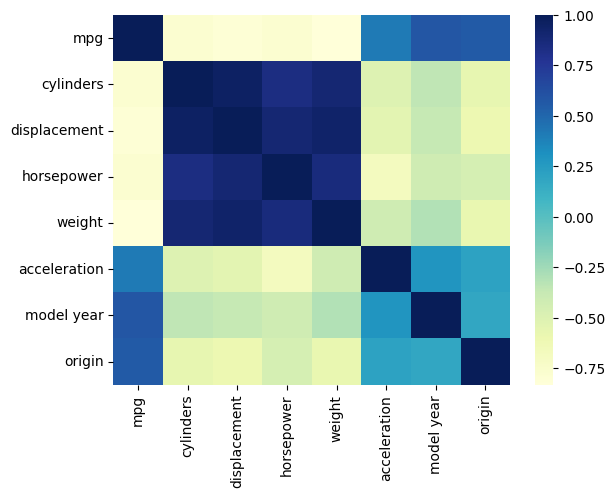

In [5]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='YlGnBu')
plt.savefig("figures/4_1_corr_heatmap.jpg")

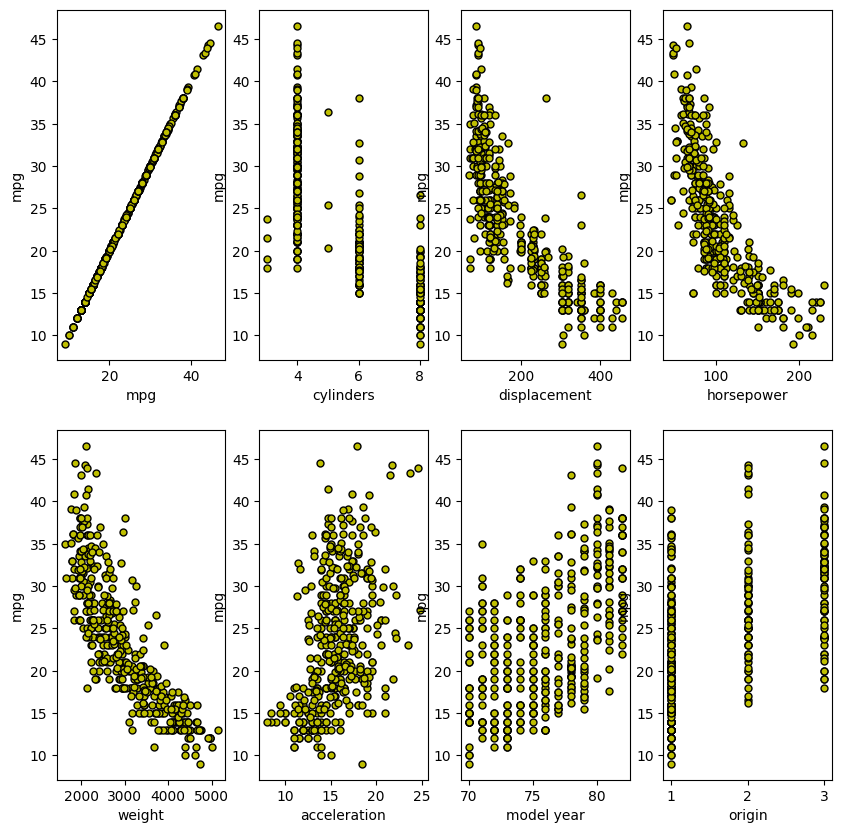

In [6]:
import math
X_cars = df.to_numpy()
y = X_cars[:,0].reshape(-1,1)
X = np.delete(X_cars,0,1)

fig, ax = plt.subplots(2,4,figsize = (10,10))
for ii in range(8):
    X = X_cars[:,ii].reshape(-1,1)
    ax[math.floor(ii/4)][ii%4].scatter(X[:,0],y,marker="o",c="y",s=25,edgecolor="k")
    ax[math.floor(ii/4)][ii%4].set_ylabel("mpg")
    ax[math.floor(ii/4)][ii%4].set_xlabel(df.columns[ii-1+1])

plt.savefig("figures/4_1_3_features.jpg")

In [7]:
#sns.pairplot(df)
#plt.show()

In [8]:
#sns.pairplot(df, hue='cylinders')

<Axes: xlabel='weight', ylabel='mpg'>

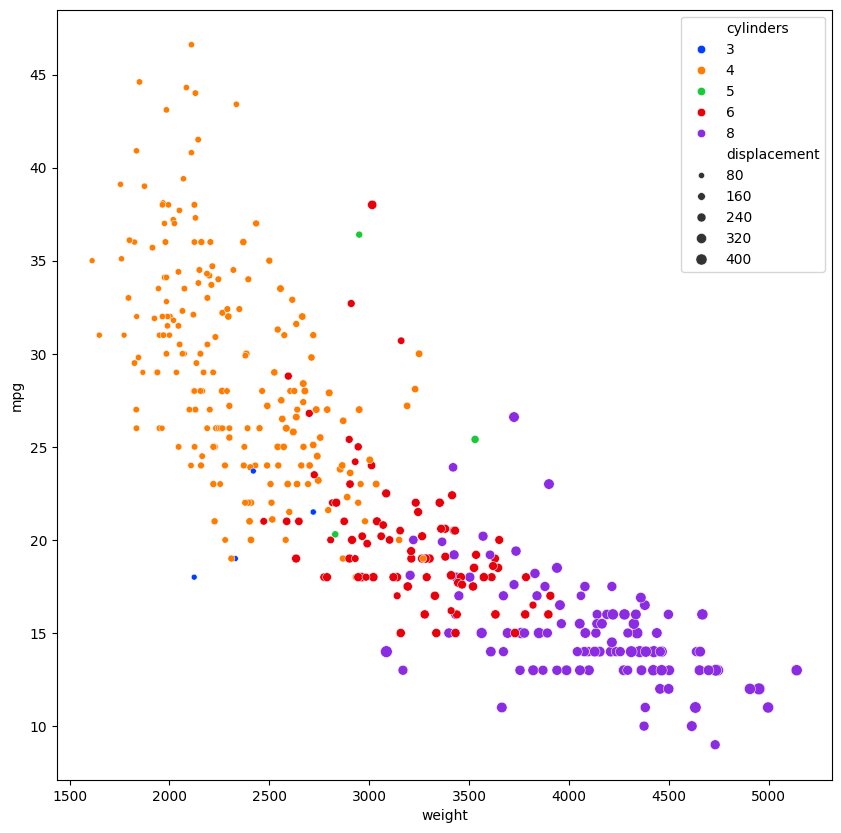

In [9]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df, x='weight', y='mpg', hue='cylinders', size='displacement', palette='bright')

In [10]:
print(df.head())
X = X_cars[:,3].reshape(-1,1) # Weight
print(X.shape)
print(y.shape)

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0         130    3504          12.0   
1  15.0          8         350.0         165    3693          11.5   
2  18.0          8         318.0         150    3436          11.0   
3  16.0          8         304.0         150    3433          12.0   
4  17.0          8         302.0         140    3449          10.5   

   model year  origin  
0          70       1  
1          70       1  
2          70       1  
3          70       1  
4          70       1  
(398, 1)
(398, 1)


[[-0.16093749]]
[40.18684019]


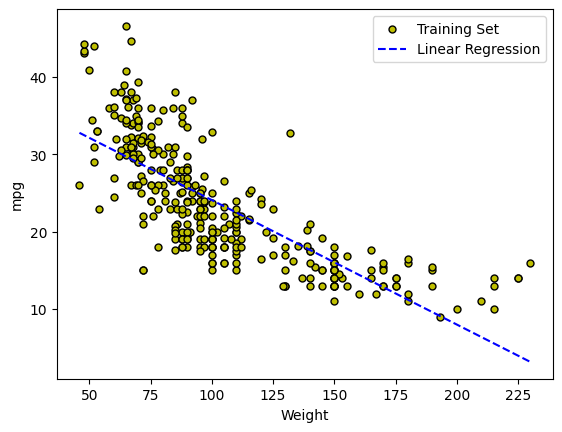

In [11]:
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)

lr = LinearRegression()
lr.fit(X_train,y_train)
print(lr.coef_)
print(lr.intercept_)

x_min = min(X_train[:,0])
x_max = max(X_train[:,0])
x_reg = np.linspace( x_min, x_max, 100 )
y_reg = lr.intercept_[0] + lr.coef_[0]*x_reg
plt.scatter(X_train[:,0],y_train,marker="o",c="y",s=25,edgecolor="k", label='Training Set')
plt.plot(x_reg, y_reg, 'b--', label='Linear Regression')
plt.ylabel("mpg")
plt.xlabel("Weight")
plt.legend()


In [12]:
from sklearn.metrics import mean_squared_error as mse
r2_score = lr.score(X_test,y_test)
print(f"R2 Score: {r2_score}")
y_predicted = lr.predict(X_test)
mse_score = mse(y_predicted, y_test)
print(f"MSE Score: {mse_score}")

R2 Score: 0.6715855152194592
MSE Score: 18.503241025683415


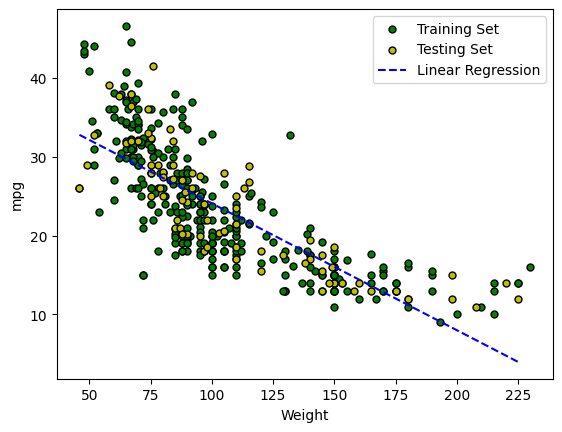

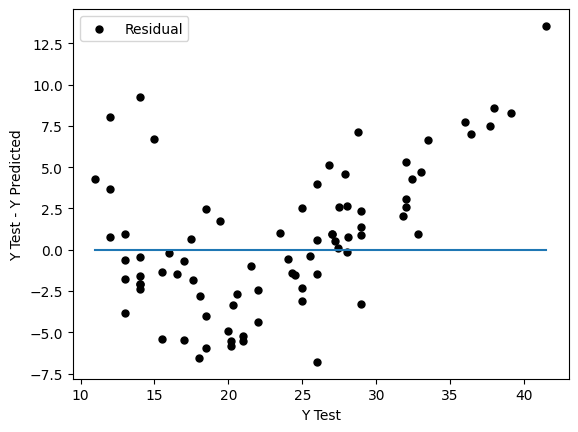

In [13]:
x_min = min(X_test[:,0])
x_max = max(X_test[:,0])
x_reg = np.linspace( x_min, x_max, 100 )
y_reg = lr.intercept_[0] + lr.coef_[0]*x_reg
plt.scatter(X_train[:,0],y_train,marker="o",c="g",s=25,edgecolor="k", label='Training Set')
plt.scatter(X_test[:,0],y_test,marker="o",c="y",s=25,edgecolor="k", label='Testing Set')
plt.plot(x_reg, y_reg, 'b--', label='Linear Regression')
plt.ylabel("mpg")
plt.xlabel("Weight")
plt.legend()
plt.savefig("figures/4_1_4_weight_data.jpg")
plt.show()


y_predicted = lr.predict(X_test)
residual = y_test - y_predicted;
plt.scatter(y_test, residual, marker='o', c='k', s=25, edgecolor="k", label='Residual')
plt.plot([min(y_test), max(y_test)], [0,0])
plt.xlabel('Y Test')
plt.ylabel('Y Test - Y Predicted')
plt.legend()
plt.savefig("figures/4_1_4_weight_residual.jpg")

# Repeat with Displacement

[[ 18.    8.  307.  ...  12.   70.    1. ]
 [ 15.    8.  350.  ...  11.5  70.    1. ]
 [ 18.    8.  318.  ...  11.   70.    1. ]
 ...
 [ 32.    4.  135.  ...  11.6  82.    1. ]
 [ 28.    4.  120.  ...  18.6  82.    1. ]
 [ 31.    4.  119.  ...  19.4  82.    1. ]]
[[-0.06128238]]
[35.43272702]


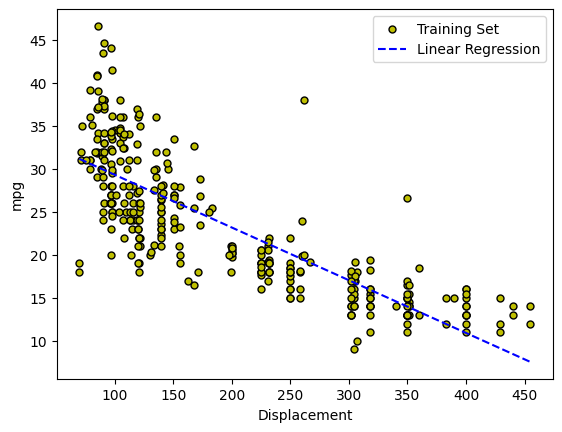

In [14]:
print(X_cars)
X = X_cars[:,2].reshape(-1,1) # Displacement

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)

lr = LinearRegression()
lr.fit(X_train,y_train)
print(lr.coef_)
print(lr.intercept_)

x_min = min(X_train[:,0])
x_max = max(X_train[:,0])
x_reg = np.linspace( x_min, x_max, 100 )
y_reg = lr.intercept_[0] + lr.coef_[0]*x_reg
plt.scatter(X_train[:,0],y_train,marker="o",c="y",s=25,edgecolor="k", label='Training Set')
plt.plot(x_reg, y_reg, 'b--', label='Linear Regression')
plt.ylabel("mpg")
plt.xlabel("Displacement")
plt.legend()


In [15]:
r2_score = lr.score(X_test,y_test)
print(f"R2 Score: {r2_score}")
y_predicted = lr.predict(X_test)
mse_score = mse(y_predicted, y_test)
print(f"MSE Score: {mse_score}")

R2 Score: 0.6373891950697743
MSE Score: 19.532098430513148


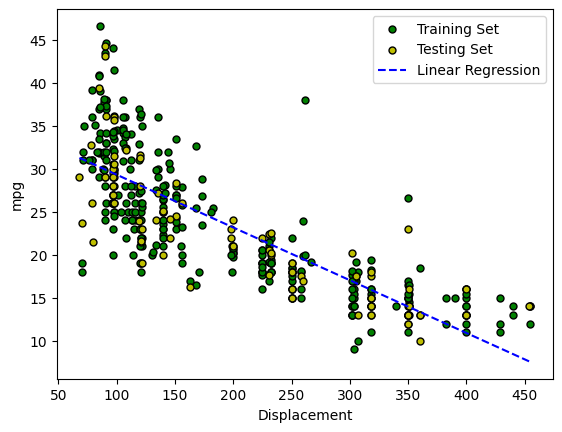

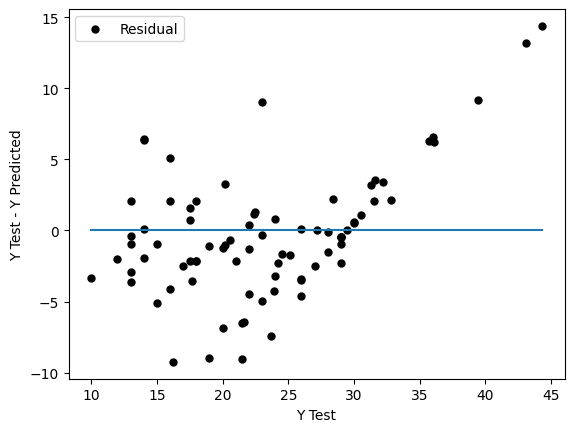

In [16]:
x_min = min(X_test[:,0])
x_max = max(X_test[:,0])
x_reg = np.linspace( x_min, x_max, 100 )
y_reg = lr.intercept_[0] + lr.coef_[0]*x_reg
plt.scatter(X_train[:,0],y_train,marker="o",c="g",s=25,edgecolor="k", label='Training Set')
plt.scatter(X_test[:,0],y_test,marker="o",c="y",s=25,edgecolor="k", label='Testing Set')
plt.plot(x_reg, y_reg, 'b--', label='Linear Regression')
plt.ylabel("mpg")
plt.xlabel("Displacement")
plt.legend()
plt.savefig("figures/4_1_4_displacement_data.jpg")
plt.show()


y_predicted = lr.predict(X_test)
residual = y_test - y_predicted;
plt.scatter(y_test, residual, marker='o', c='k', s=25, edgecolor="k", label='Residual')
plt.plot([min(y_test), max(y_test)], [0,0])
plt.xlabel('Y Test')
plt.ylabel('Y Test - Y Predicted')
plt.legend()
plt.savefig("figures/4_1_4_displacement_residual.jpg")

In [17]:
# Model year reference
print(X_cars)
X = X_cars[:,7].reshape(-1,1) # Model Year

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)

lr = LinearRegression()
lr.fit(X_train,y_train)
print(lr.coef_)
print(lr.intercept_)
r2_score = lr.score(X_test,y_test)
print(f"R2 Score: {r2_score}")
y_predicted = lr.predict(X_test)
mse_score = mse(y_predicted, y_test)
print(f"MSE Score: {mse_score}")

[[ 18.    8.  307.  ...  12.   70.    1. ]
 [ 15.    8.  350.  ...  11.5  70.    1. ]
 [ 18.    8.  318.  ...  11.   70.    1. ]
 ...
 [ 32.    4.  135.  ...  11.6  82.    1. ]
 [ 28.    4.  120.  ...  18.6  82.    1. ]
 [ 31.    4.  119.  ...  19.4  82.    1. ]]
[[5.56138882]]
[14.66709829]
R2 Score: 0.30835160566302766
MSE Score: 34.61730905554045


# TWo Feature Weight/Displacement

[[-0.01879226 -0.00551768]]
[43.57920088]


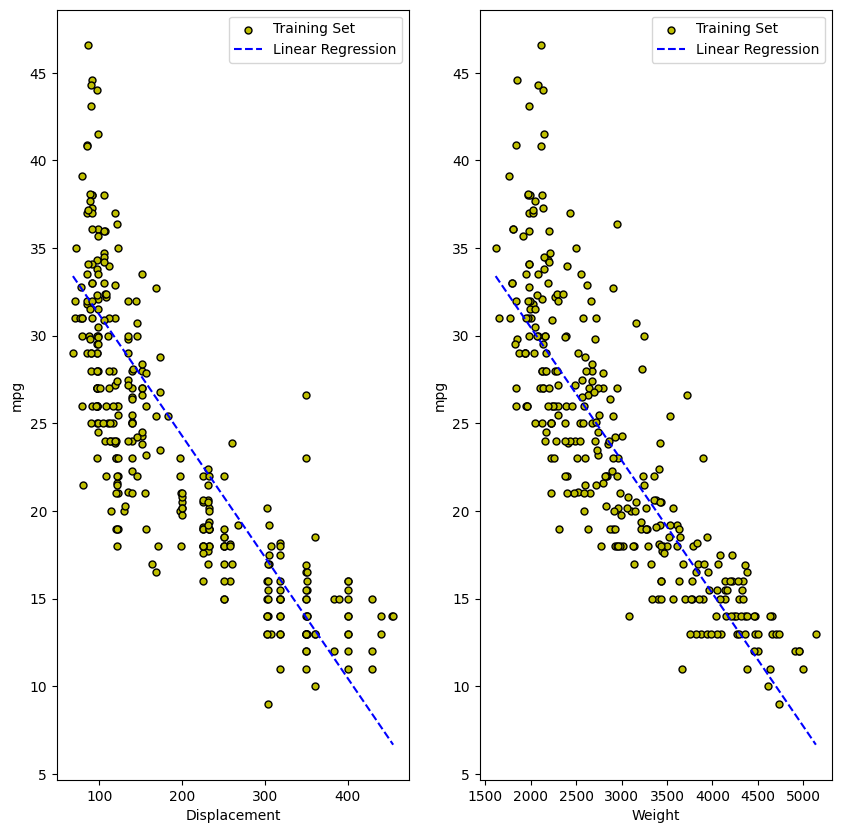

In [18]:

X = X_cars[:,[2,4]] # Displacement
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)

lr = LinearRegression()
lr.fit(X_train,y_train)
print(lr.coef_)
print(lr.intercept_)

x_min_0 = min(X_train[:,0])
x_max_0 = max(X_train[:,0])
x_reg_0 = np.linspace( x_min_0, x_max_0, 100 )

x_min_1 = min(X_train[:,1])
x_max_1 = max(X_train[:,1])
x_reg_1 = np.linspace( x_min_1, x_max_1, 100 )

y_reg = lr.intercept_[0] + lr.coef_[0][0]*x_reg_0 + lr.coef_[0][1]*x_reg_1

fig, ax = plt.subplots(1,2,figsize = (10,10))
ax[0].scatter(X_train[:,0],y_train,marker="o",c="y",s=25,edgecolor="k", label='Training Set')
ax[0].plot(x_reg_0, y_reg, 'b--', label='Linear Regression')
ax[0].set_ylabel("mpg")
ax[0].set_xlabel("Displacement")
ax[0].legend()

ax[1].scatter(X_train[:,1],y_train,marker="o",c="y",s=25,edgecolor="k", label='Training Set')
ax[1].plot(x_reg_1, y_reg, 'b--', label='Linear Regression')
ax[1].set_ylabel("mpg")
ax[1].set_xlabel("Weight")
ax[1].legend()

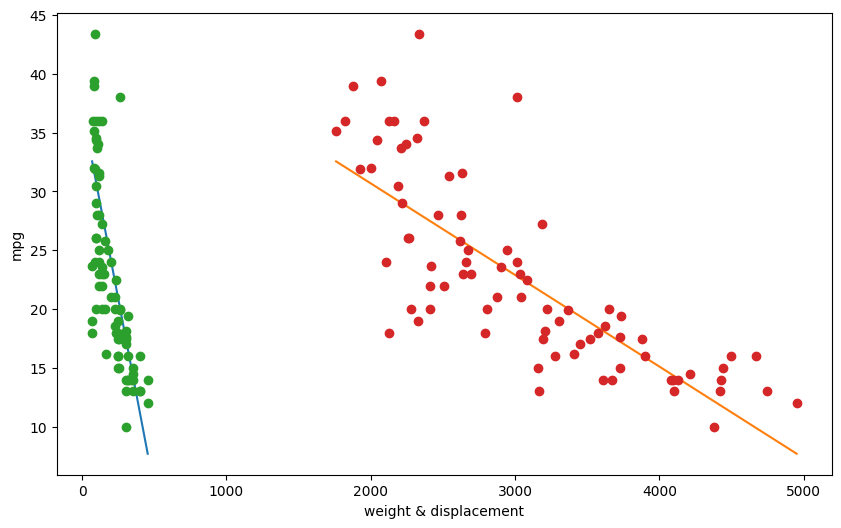

In [19]:
x_min = X_test.min(0)
x_max = X_test.max(0)
xx = np.linspace(x_min, x_max, 100)
y_pred = lr.predict(xx)
fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.plot(xx,y_pred)
ax.plot(X_test, y_test, 'o' )
ax.set_ylabel('mpg')
ax.set_xlabel('weight & displacement')
plt.savefig("figures/4_1_4_both_data.jpg")
plt.show()

In [20]:
X = X_cars[:,[2,4]] 
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)

lr = LinearRegression()
lr.fit(X_train,y_train)
print(lr.coef_)
print(lr.intercept_)

r2_score = lr.score(X_test,y_test)
print(f"R2 Score: {r2_score}")
y_predicted = lr.predict(X_test)
mse_score = mse(y_predicted, y_test)
print(f"MSE Score: {mse_score}")

[[-0.01682964 -0.00563195]]
[43.54814425]
R2 Score: 0.7269925578195933
MSE Score: 15.51183240241111


# All Features

In [21]:
X = X_cars[:,[1,2,3,4,5]] 
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)

lr = LinearRegression()
lr.fit(X_train,y_train)
print(lr.coef_)
print(lr.intercept_)

r2_score = lr.score(X_test,y_test)
print(f"R2 Score: {r2_score}")
y_predicted = lr.predict(X_test)
mse_score = mse(y_predicted, y_test)
print(f"MSE Score: {mse_score}")

[[-0.2924654   0.00064143 -0.06912909 -0.00493852 -0.17300784]]
[49.60453878]
R2 Score: 0.648409295845415
MSE Score: 22.03803715013644


# KERNEL RIDGE REGRESSION

In [22]:
from sklearn.kernel_ridge import KernelRidge

X = X_cars[:,3].reshape(-1,1) # Weight
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)

kr = KernelRidge( kernel='poly', degree=2)
kr.fit(X_train,y_train)
y_pred = kr.predict(X_test)


r2_score = kr.score(X_test,y_test)
print(f"R2 Score: {r2_score}")
y_predicted = kr.predict(X_test)
mse_score = mse(y_pred, y_test)
print(f"MSE Score: {mse_score}")

R2 Score: 0.66514074112226
MSE Score: 24.525727829579957


C:\Users\Stewart\Documents\GMU\gmu-ece-527\env_39\lib\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


[]

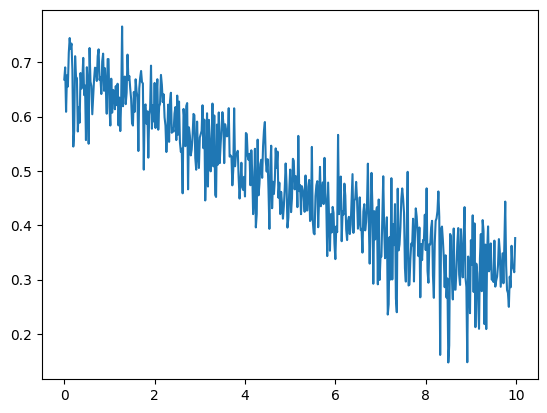

In [23]:
#Experiment with regularization

N = 500
r2_scores = np.zeros((N,))
mse_scores = np.zeros((N,))
reg_vals = np.zeros((N,))
for idx, reg  in enumerate(range(N)):
    reg_val = reg/50
    reg_vals[idx] = reg_val
    
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)
    kr = KernelRidge( alpha=reg_val, kernel='poly', degree=2)
    kr.fit(X_train,y_train)
    y_pred = kr.predict(X_test)
    r2_scores[idx] = kr.score(X_test,y_test)
    mse_scores[idx] = mse(y_pred, y_test)
    
plt.plot(reg_vals, r2_scores )
plt.plot()

C:\Users\Stewart\Documents\GMU\gmu-ece-527\env_39\lib\site-packages\sklearn\linear_model\_ridge.py:253: LinAlgWarning: Ill-conditioned matrix (rcond=5.4953e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
C:\Users\Stewart\Documents\GMU\gmu-ece-527\env_39\lib\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Users\Stewart\Documents\GMU\gmu-ece-527\env_39\lib\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Users\Stewart\Documents\GMU\gmu-ece-527\env_39\lib\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Users\Stewart\Documents\GMU\gmu-ece-527\env_39\lib\site-packages\sklearn\linear_model\_ridge.py:255:

R2 Score: 0.6928315737265907
MSE Score: 19.51885206456401


C:\Users\Stewart\Documents\GMU\gmu-ece-527\env_39\lib\site-packages\sklearn\linear_model\_ridge.py:253: LinAlgWarning: Ill-conditioned matrix (rcond=1.78781e-18): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
C:\Users\Stewart\Documents\GMU\gmu-ece-527\env_39\lib\site-packages\sklearn\linear_model\_ridge.py:253: LinAlgWarning: Ill-conditioned matrix (rcond=1.25882e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
C:\Users\Stewart\Documents\GMU\gmu-ece-527\env_39\lib\site-packages\sklearn\linear_model\_ridge.py:253: LinAlgWarning: Ill-conditioned matrix (rcond=1.04437e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
C:\Users\Stewart\Documents\GMU\gmu-ece-527\env_39\lib\site-packages\sklearn\linear_model\_ridge.py:253: LinAlgWarning: Ill-conditioned matrix (rcond=9.56708e-18): result may not be accurate.
  dual_coef = linalg.solve(K, y,

[]

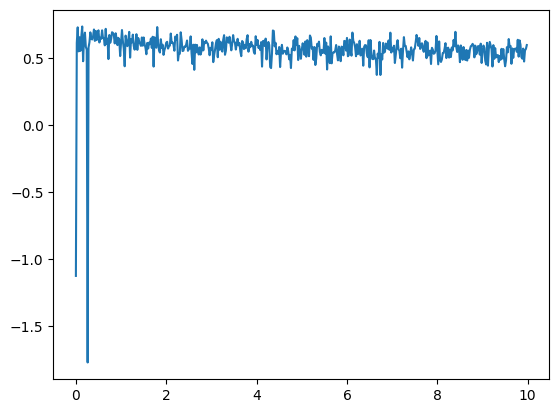

In [24]:
# POly 3

X = X_cars[:,3].reshape(-1,1) # Weight
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)

kr = KernelRidge( kernel='poly', degree=3)
kr.fit(X_train,y_train)
y_pred = kr.predict(X_test)


r2_score = kr.score(X_test,y_test)
print(f"R2 Score: {r2_score}")
y_predicted = kr.predict(X_test)
mse_score = mse(y_pred, y_test)
print(f"MSE Score: {mse_score}")

#Experiment with regularization

N = 500
r2_scores = np.zeros((N,))
mse_scores = np.zeros((N,))
reg_vals = np.zeros((N,))
for idx, reg  in enumerate(range(N)):
    reg_val = reg/50
    reg_vals[idx] = reg_val
    
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)
    kr = KernelRidge( alpha=reg_val, kernel='poly', degree=3)
    kr.fit(X_train,y_train)
    y_pred = kr.predict(X_test)
    r2_scores[idx] = kr.score(X_test,y_test)
    mse_scores[idx] = mse(y_pred, y_test)
    
plt.plot(reg_vals, r2_scores )
plt.plot()